                                            Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.



In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  roc_curve,roc_auc_score,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
grade=pd.read_csv(r'C:\Users\HP\Downloads\Grades.csv')
grade

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Exploratory Data analysis

In [133]:
#finding the shape of the dataset:
grade.shape

(571, 43)

In [134]:
#finding the column names:
grade.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

As we all no seat has no impact on the dataset. so, dropping that column is safe.

In [135]:
#dropping Seat no column:
grade.drop('Seat No.',axis=1,inplace=True)

In [136]:
grade.columns.tolist()

['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [137]:
grade.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [138]:
#replacing the categorical column to normal values:
for column in grade.columns:
    
    grade[column]=grade[column].replace('A+',5.0)
    grade[column]=grade[column].replace('A',4.5)
    grade[column]=grade[column].replace('A-',4.25)
    grade[column]=grade[column].replace('B+',4.0)
    grade[column]=grade[column].replace('B',3.5)
    grade[column]=grade[column].replace('B-',3.25)
    grade[column]=grade[column].replace('C+',3.0)
    grade[column]=grade[column].replace('C',2.5)
    grade[column]=grade[column].replace('C-',2.25)
    grade[column]=grade[column].replace('D+',2.0)
    grade[column]=grade[column].replace('D',1.5)
    grade[column]=grade[column].replace('F',0.0)

here i am taking some imaginary values and trying to model a best one.

In [139]:
grade.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,3.25,2.00,2.25,2.5,2.25,2.00,1.5,2.25,3.25,2.25,...,2.25,2.25,2.25,2.25,4.25,4.5,2.25,3.50,4.25,2.205
1,4.5,1.50,2.0,1.5,3.25,2.50,1.5,4.5,2.0,1.5,...,2.0,1.50,2.50,1.5,4.25,3.25,2.50,2.50,3.5,2.008
2,4.5,3.50,4.5,3.25,4.0,4.50,3.25,4.0,4.25,4.25,...,3.5,3.50,4.50,2.5,4.5,4.5,4.50,4.25,4.5,3.608
3,1.5,3.00,2.0,1.5,1.5,4.25,2.0,2.25,1.5,3.0,...,2.0,2.50,2.00,2.25,3.25,3.5,3.00,3.00,3.0,1.906
4,4.25,4.25,4.25,4.0,4.5,4.50,4.25,4.0,4.5,4.25,...,3.25,4.00,4.00,3.25,4.25,4.5,4.25,4.25,4.5,3.448


In [140]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    float64
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    float64
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

In [141]:
#checking null values:
grade.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [142]:
#finding shape
grade.shape

(571, 42)

In [143]:
missingdata=grade.isnull()

In [144]:
#finding value count for each column
for k in missingdata.columns.values.tolist():
    print(k)
    print (missingdata[k].value_counts())
    print("")  

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    570
True       1
Name: CY-105, dtype: int64

HS-105/12
False    570
True       1
Name: HS-105/12, dtype: int64

MT-111
False    569
True       2
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    569
True       2
Name: CS-106, dtype: int64

EL-102
False    569
True       2
Name: EL-102, dtype: int64

EE-119
False    569
True       2
Name: EE-119, dtype: int64

ME-107
False    569
True       2
Name: ME-107, dtype: int64

CS-107
False    569
True       2
Name: CS-107, dtype: int64

HS-205/20
False    566
True       5
Name: HS-205/20, dtype: int64

MT-222
False    566
True       5
Name: MT-222, dtype: int64

EE-222
False    564
True       7
Name: EE-222, dtype: int64

MT-224
False    564
True       7
Name: MT-224, dtype: int64

CS-210
False    564
True       7
Name: CS-210, dtype: int64

CS-211
False    566
True       5
Name: CS-211, dtyp

In [145]:
#applying lambda function
data= grade.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [146]:
#checking null values
data.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<AxesSubplot:>

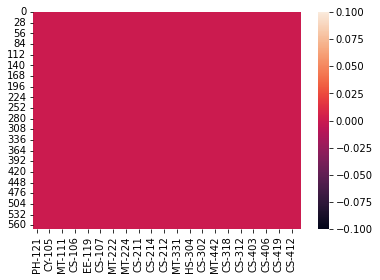

In [147]:
#checking heatmap for null values
sns.heatmap(data.isnull())

In [148]:
#value count of columns
for i in data.columns:
    x = data[i].value_counts()
    print(x)

4.25    112
4.5     111
4.0      61
3.5      57
3.25     56
1.5      44
2.5      33
3.0      31
2.0      22
5.0      22
2.25     19
WU        2
0.0       1
Name: PH-121, dtype: int64
4.25    82
3.25    78
2.50    68
3.50    63
4.00    59
2.25    50
3.00    47
1.50    45
4.50    38
2.00    36
5.00     4
0.00     1
Name: HS-101, dtype: int64
4.5     178
4.25    120
4.0      50
3.5      49
3.25     42
1.5      31
5.0      31
2.5      19
3.0      17
2.25     16
2.0      14
WU        3
0.0       1
Name: CY-105, dtype: int64
4.5     97
4.25    75
4.0     70
3.5     57
1.5     45
2.5     41
3.25    40
3.0     39
2.25    36
2.0     34
5.0     34
WU       2
0.0      1
Name: HS-105/12, dtype: int64
4.25    107
4.5     100
3.25     70
4.0      62
3.5      55
2.25     39
3.0      33
2.5      30
1.5      26
5.0      23
2.0      21
WU        3
0.0       2
Name: MT-111, dtype: int64
4.50    151
4.25    134
4.00     60
3.50     51
5.00     43
3.25     38
3.00     23
2.50     22
2.25     22
2.00     15

In [149]:
#dropping wu and w columns
grading=data  
for i in grading.columns:
    grading.drop(grading[(grading.loc[:,i]=='WU')| (grading.loc[:,i]=='W')].index,inplace=True)

In [150]:
grading.reset_index(drop=True,inplace=True)
grading

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,3.25,2.00,2.25,2.5,2.25,2.00,1.5,2.25,3.25,2.25,...,2.25,2.25,2.25,2.25,4.25,4.5,2.25,3.50,4.25,2.205
1,4.5,1.50,2.0,1.5,3.25,2.50,1.5,4.5,2.0,1.5,...,2.0,1.50,2.50,1.5,4.25,3.25,2.50,2.50,3.5,2.008
2,4.5,3.50,4.5,3.25,4.0,4.50,3.25,4.0,4.25,4.25,...,3.5,3.50,4.50,2.5,4.5,4.5,4.50,4.25,4.5,3.608
3,1.5,3.00,2.0,1.5,1.5,4.25,2.0,2.25,1.5,3.0,...,2.0,2.50,2.00,2.25,3.25,3.5,3.00,3.00,3.0,1.906
4,4.25,4.25,4.25,4.0,4.5,4.50,4.25,4.0,4.5,4.25,...,3.25,4.00,4.00,3.25,4.25,4.5,4.25,4.25,4.5,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.5,4.50,4.5,4.25,5.0,4.50,4.25,4.25,5.0,4.0,...,4.25,4.25,4.50,4.5,4.5,4.0,4.00,3.50,4.5,3.798
543,5.0,4.50,4.5,4.5,4.5,4.50,4.5,4.25,4.5,4.5,...,4.0,4.00,4.50,4.5,4.25,3.5,4.25,2.50,4.25,3.772
544,3.5,4.50,4.25,4.0,4.5,4.50,4.5,4.5,4.5,3.5,...,4.25,3.50,4.50,4.0,4.5,2.5,4.00,4.25,4.25,3.470
545,4.5,4.00,1.5,4.5,1.5,2.00,3.25,2.25,3.25,2.25,...,1.5,3.50,3.50,2.25,1.5,2.5,3.50,3.25,2.5,2.193


In [151]:
#summary of the dataset
grading.describe()

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.203382,3.939671,3.660420,3.473949,3.679159,3.509598,3.847349,3.293419,3.693784,3.606033,3.555759,2.995388
std,0.911678,0.794624,0.962541,0.910678,0.771597,0.968612,0.882526,0.866587,0.857347,0.726557,0.868322,0.587388
min,0.000000,1.500000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.800000
25%,2.500000,3.500000,3.250000,3.000000,3.250000,2.500000,3.500000,2.500000,3.250000,3.250000,3.000000,2.587500
50%,3.250000,4.250000,4.000000,3.500000,4.000000,3.500000,4.250000,3.250000,4.000000,3.500000,4.000000,3.058000
75%,4.000000,4.500000,4.500000,4.250000,4.250000,4.250000,4.500000,4.000000,4.500000,4.250000,4.250000,3.474000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.985000


By the describe method the following assumptions are made:

1. The count value in each column is same that means there is no null values in the data.
2. The mean is greater than 50% of median in all columns which means there is skewness in the data
3. we can also get standard deviation, min,25%, 75% values  in these method.

Visualization

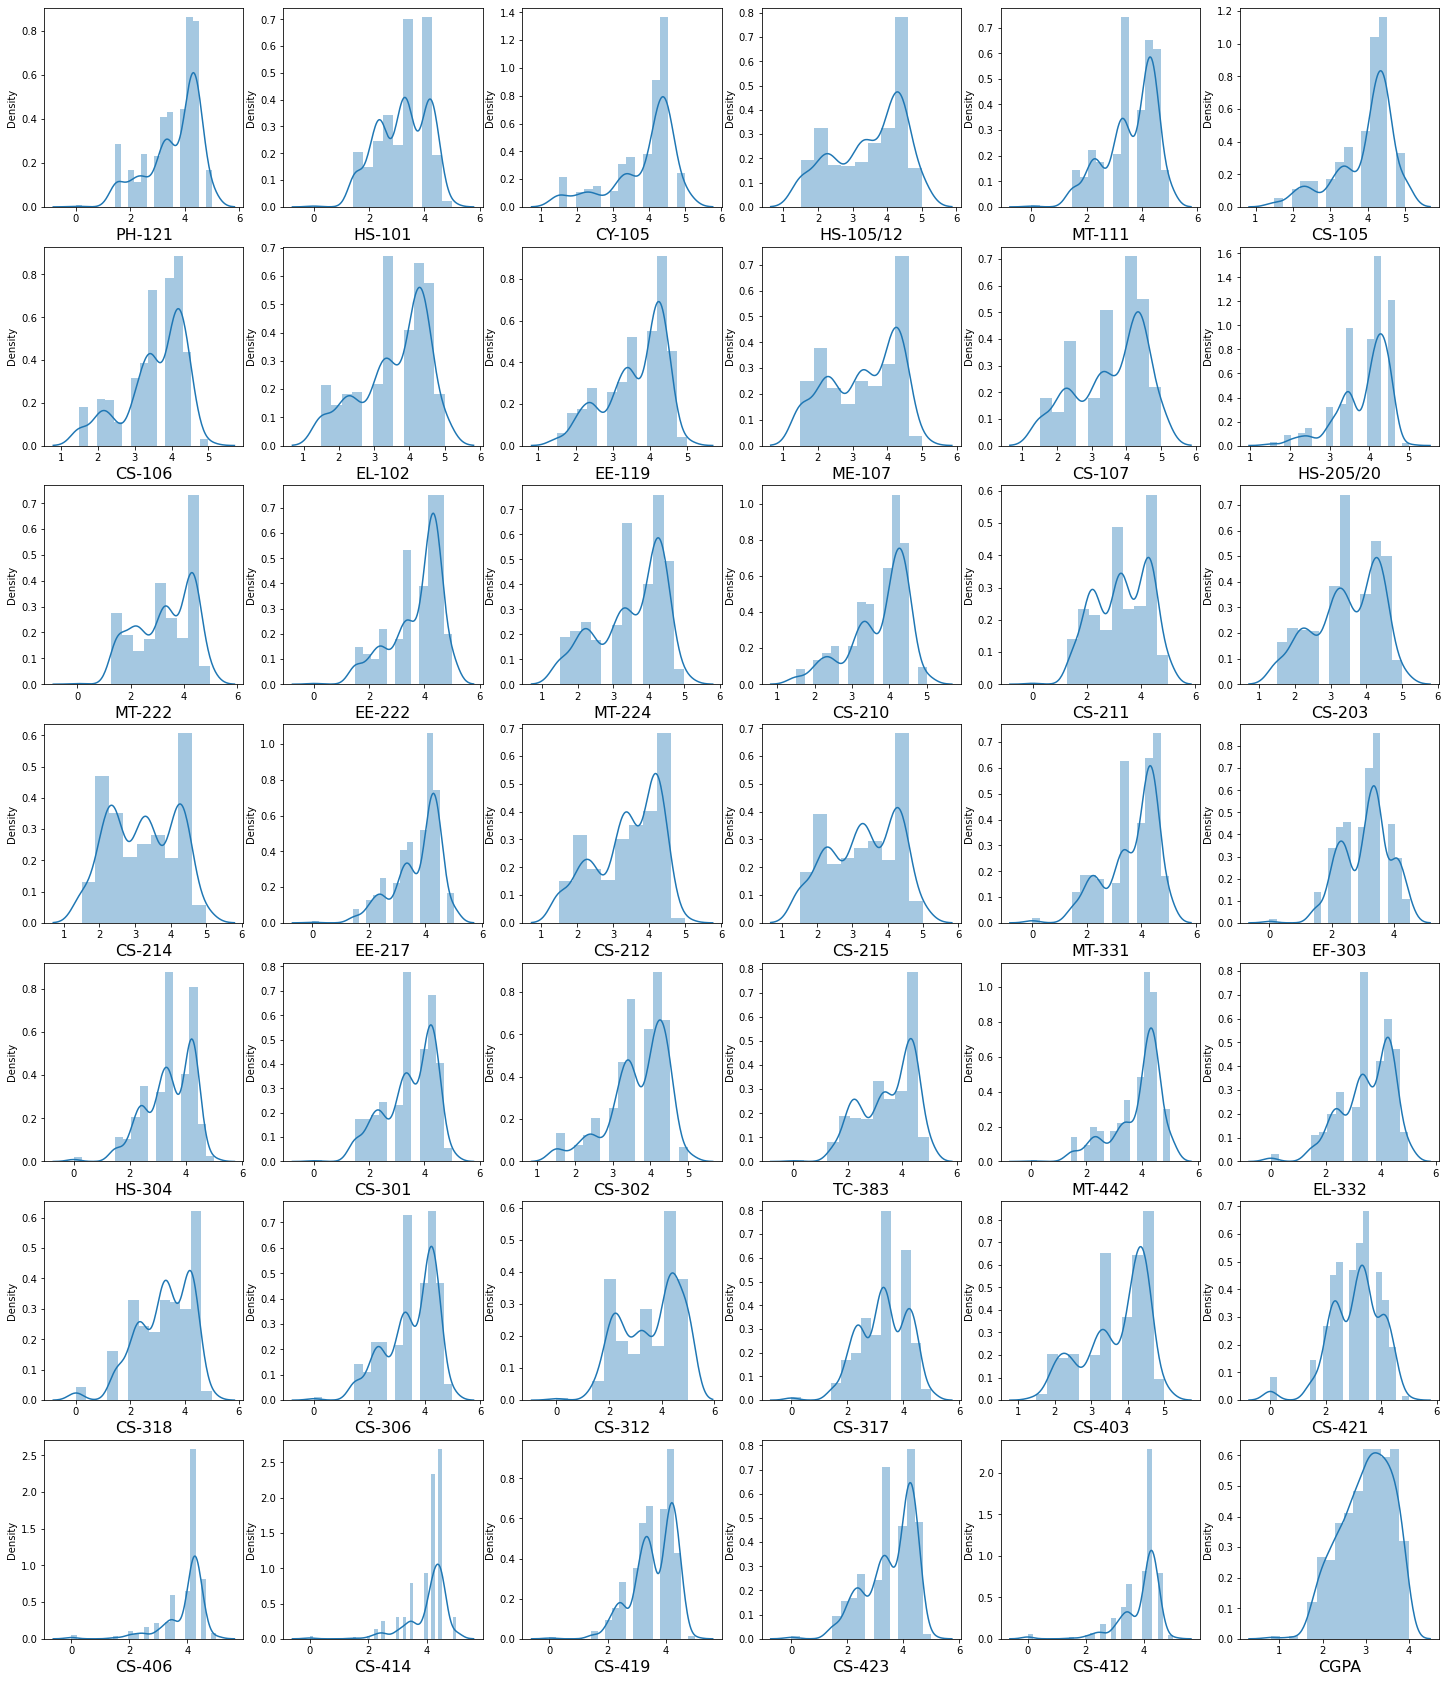

In [152]:
#ploting distribution plot
plt.figure(figsize=(25,30),facecolor="white")
plotnumber=1
for columns in grading:
    if plotnumber<=42:
    
        ax=plt.subplot(7,6,plotnumber)
        sns.distplot(grading[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

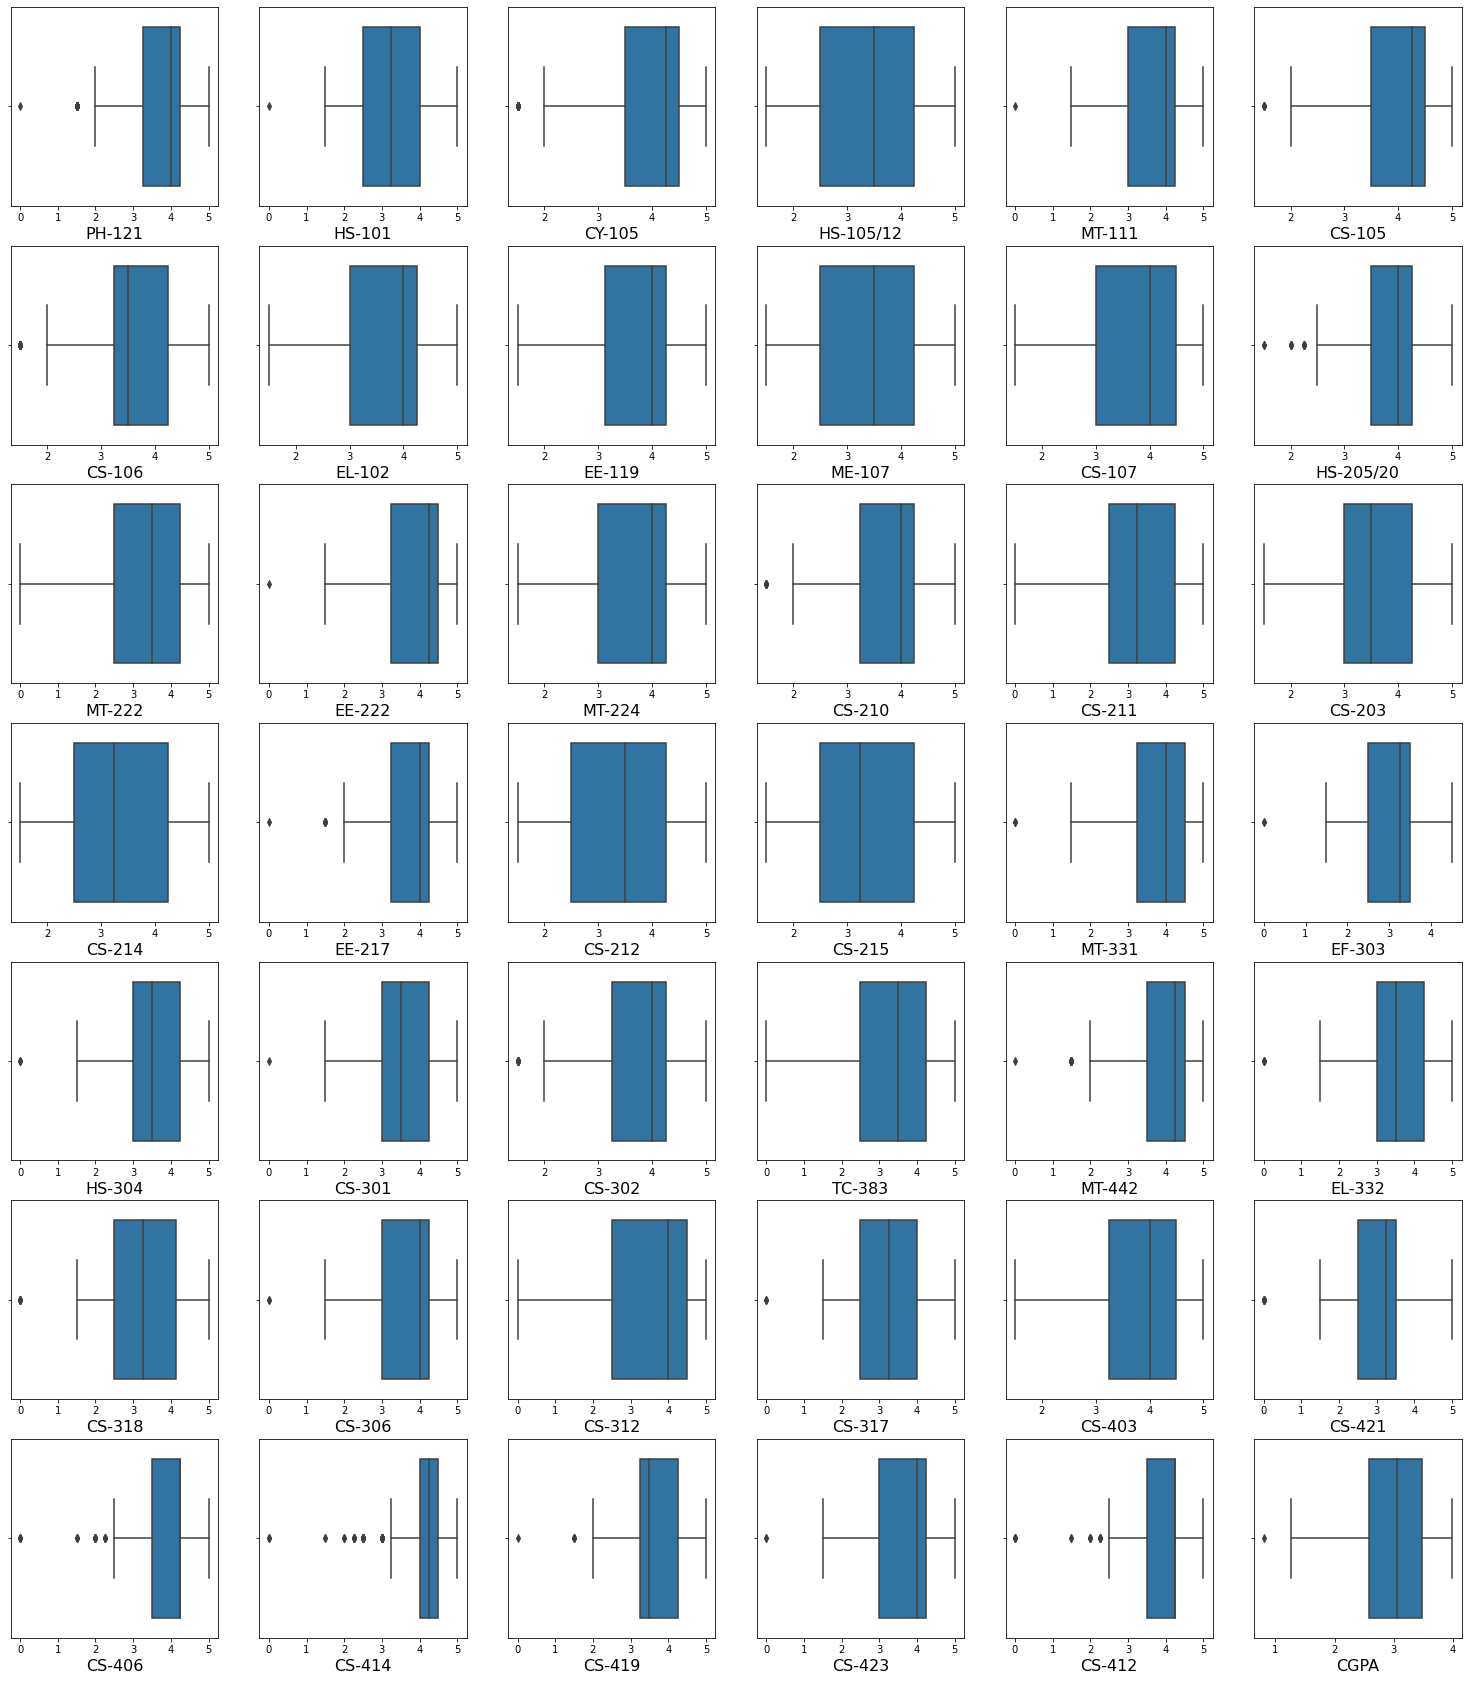

In [153]:
#plotting box plot
plt.figure(figsize=(26,30),facecolor="white")
plotnumber=1
for columns in grading:
    if plotnumber<=42:
    
        ax=plt.subplot(7,6,plotnumber)
        sns.boxplot(grading[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

In [156]:
#checking skewness
grading.skew()

PH-121      -0.885376
HS-101      -0.285520
CY-105      -1.263067
HS-105/12   -0.480542
MT-111      -0.742729
CS-105      -1.148948
CS-106      -0.901968
EL-102      -0.685539
EE-119      -0.751120
ME-107      -0.354575
CS-107      -0.542454
HS-205/20   -1.225275
MT-222      -0.368486
EE-222      -1.004300
MT-224      -0.627740
CS-210      -0.966556
CS-211      -0.222272
CS-203      -0.448967
CS-214      -0.038418
EE-217      -0.968881
CS-212      -0.584823
CS-215      -0.259084
MT-331      -0.927468
EF-303      -0.383486
HS-304      -0.743356
CS-301      -0.681550
CS-302      -0.945686
TC-383      -0.504210
MT-442      -1.191570
EL-332      -0.822088
CS-318      -0.738376
CS-306      -0.807348
CS-312      -0.377138
CS-317      -0.375060
CS-403      -0.704853
CS-421      -0.715314
CS-406      -2.351439
CS-414      -2.109019
CS-419      -0.831814
CS-423      -0.870018
CS-412      -2.431781
CGPA        -0.428093
dtype: float64

In [157]:
#corelation b/n features and target variable.
corr=grading.corr()
corr

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
HS-101,1.000000,0.433640,0.156332,0.327088,0.396090,0.360742,0.282085,0.409703,0.266402,0.273781,0.249397,0.560102
CS-105,0.433640,1.000000,0.257222,0.298215,0.502137,0.249269,0.503138,0.420221,0.326691,0.363425,0.077216,0.606919
MT-331,0.156332,0.257222,1.000000,0.532091,0.386929,0.427330,0.336523,0.485121,0.462731,0.453909,0.311951,0.563318
CS-301,0.327088,0.298215,0.532091,1.000000,0.587408,0.645888,0.440272,0.667494,0.622243,0.633048,0.583767,0.758289
CS-302,0.396090,0.502137,0.386929,0.587408,1.000000,0.508639,0.521676,0.658393,0.459786,0.536345,0.433204,0.754297
TC-383,0.360742,0.249269,0.427330,0.645888,0.508639,1.000000,0.314395,0.582357,0.543058,0.491722,0.549205,0.658480
MT-442,0.282085,0.503138,0.336523,0.440272,0.521676,0.314395,1.000000,0.536733,0.365192,0.447671,0.263871,0.639440
CS-317,0.409703,0.420221,0.485121,0.667494,0.658393,0.582357,0.536733,1.000000,0.545618,0.617175,0.544723,0.809844
CS-403,0.266402,0.326691,0.462731,0.622243,0.459786,0.543058,0.365192,0.545618,1.000000,0.625381,0.349107,0.641322
CS-419,0.273781,0.363425,0.453909,0.633048,0.536345,0.491722,0.447671,0.617175,0.625381,1.000000,0.459457,0.703210


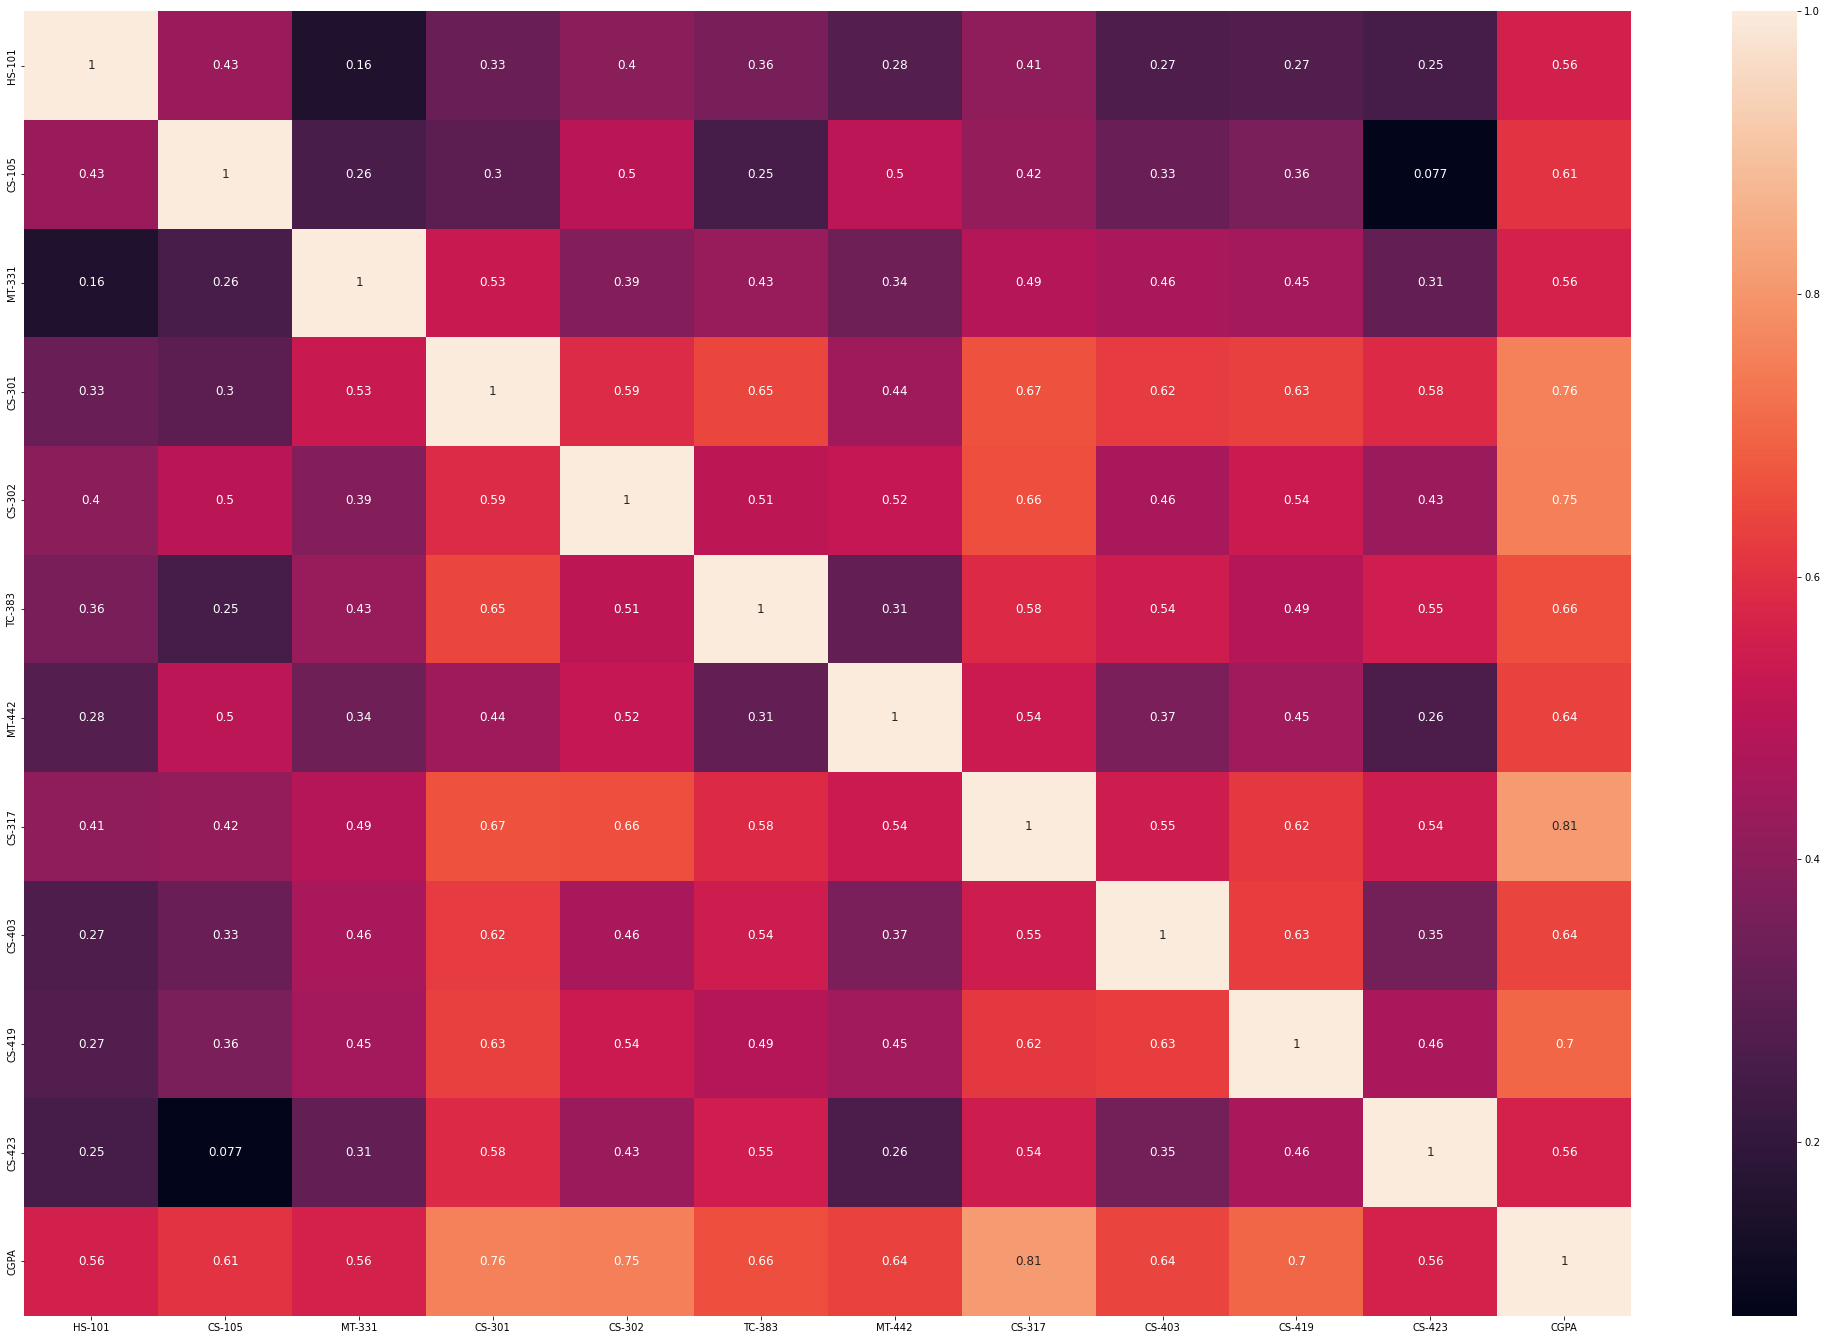

In [158]:
#plotting heatmap for correlation
df_corr=data.corr().abs()
plt.figure(figsize=(36,24))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

In [159]:
#arranging the value in ascending order
corr['CGPA'].sort_values(ascending=False)

CGPA      1.000000
CS-317    0.809844
CS-301    0.758289
CS-302    0.754297
CS-419    0.703210
TC-383    0.658480
CS-403    0.641322
MT-442    0.639440
CS-105    0.606919
MT-331    0.563318
CS-423    0.561605
HS-101    0.560102
Name: CGPA, dtype: float64

CS-317 has highest correlation with all the columns.

In [160]:
#dropping the CS-317 column
grading.drop('CS-317',axis=1)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,3.25,2.00,2.25,2.5,2.25,2.00,1.5,2.25,3.25,2.25,...,2.5,2.25,2.25,2.25,4.25,4.5,2.25,3.50,4.25,2.205
1,4.5,1.50,2.0,1.5,3.25,2.50,1.5,4.5,2.0,1.5,...,1.5,2.0,2.50,1.5,4.25,3.25,2.50,2.50,3.5,2.008
2,4.5,3.50,4.5,3.25,4.0,4.50,3.25,4.0,4.25,4.25,...,4.25,3.5,4.50,2.5,4.5,4.5,4.50,4.25,4.5,3.608
3,1.5,3.00,2.0,1.5,1.5,4.25,2.0,2.25,1.5,3.0,...,2.25,2.0,2.00,2.25,3.25,3.5,3.00,3.00,3.0,1.906
4,4.25,4.25,4.25,4.0,4.5,4.50,4.25,4.0,4.5,4.25,...,4.25,3.25,4.00,3.25,4.25,4.5,4.25,4.25,4.5,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.5,4.50,4.5,4.25,5.0,4.50,4.25,4.25,5.0,4.0,...,4.0,4.25,4.50,4.5,4.5,4.0,4.00,3.50,4.5,3.798
543,5.0,4.50,4.5,4.5,4.5,4.50,4.5,4.25,4.5,4.5,...,4.25,4.0,4.50,4.5,4.25,3.5,4.25,2.50,4.25,3.772
544,3.5,4.50,4.25,4.0,4.5,4.50,4.5,4.5,4.5,3.5,...,4.0,4.25,4.50,4.0,4.5,2.5,4.00,4.25,4.25,3.470
545,4.5,4.00,1.5,4.5,1.5,2.00,3.25,2.25,3.25,2.25,...,4.0,1.5,3.50,2.25,1.5,2.5,3.50,3.25,2.5,2.193


In [161]:
#fixing features and labels
a=grading.drop('CGPA', axis=1)
b=grading['CGPA']

In [162]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.389130,-1.321173,-1.810073,-0.964898,-1.475719,-2.443227,-2.474694,-1.393598,-0.450691,-1.042958,...,-1.145934,-1.225147,-1.205157,-1.685556,-0.931634,0.451169,0.668194,-1.868091,-0.064273,0.510459
1,0.913528,-1.870114,-2.089686,-1.943209,-0.388190,-1.813423,-2.474694,0.954343,-2.010997,-1.788706,...,-2.252912,-1.452549,-2.071414,-1.393691,-1.762058,0.451169,-1.148417,-1.523687,-1.216974,-0.539245
2,0.913528,0.325652,0.706445,-0.231164,0.427457,0.705796,-0.364785,0.432578,0.797553,0.945706,...,0.791277,-0.088134,0.238603,0.941222,-0.654826,0.792039,0.668194,1.231542,0.800253,0.860361
3,-2.212852,-0.223290,-2.089686,-1.943209,-2.291366,0.390893,-1.871863,-1.393598,-2.635119,-0.297209,...,-1.422679,-1.452549,-0.916405,-1.977420,-0.931634,-0.912309,-0.785095,-0.834880,-0.640624,-1.239047
4,0.652996,1.149064,0.426832,0.502569,0.971221,0.705796,0.840878,0.432578,1.109614,0.945706,...,0.791277,-0.315537,0.816107,0.357494,0.175599,0.451169,0.668194,0.887139,0.800253,0.860361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.128599,1.423535,0.706445,0.747147,1.514985,0.705796,0.840878,0.693461,1.733736,0.697123,...,0.514532,0.594073,1.104860,0.941222,1.559639,0.792039,-0.058450,0.542735,-0.064273,0.860361
543,1.434591,1.423535,0.706445,0.991725,0.971221,0.705796,1.142294,0.693461,1.109614,1.194289,...,0.791277,0.366671,0.816107,0.941222,1.559639,0.451169,-0.785095,0.887139,-1.216974,0.510459
544,-0.128599,1.423535,0.426832,0.502569,0.971221,0.705796,1.142294,0.954343,1.109614,0.199957,...,0.514532,0.594073,0.238603,0.941222,1.006023,0.792039,-2.238384,0.542735,0.800253,0.510459
545,0.913528,0.874593,-2.648912,0.991725,-2.291366,-2.443227,-0.364785,-1.393598,-0.450691,-1.042958,...,0.514532,-1.907354,0.238603,-0.226235,-0.931634,-3.298395,-2.238384,-0.146072,-0.352448,-1.938850


In [163]:
#checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,3.249937,PH-121
1,1.984894,HS-101
2,2.814984,CY-105
3,2.667392,HS-105/12
4,2.857743,MT-111
5,2.756178,CS-105
6,2.326424,CS-106
7,2.264697,EL-102
8,2.543902,EE-119
9,2.395916,ME-107


Luckily there is no multicollinearity problem.

Modelling

In [164]:
#finding the best random state
Accu_max=0
Rs_max=0
for k in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.25, random_state=k)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.9884907888366402 at random state is 69


In [165]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.25, random_state=494)

In [166]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [167]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))


R2_score: 0.9826195664872472
R2_score on training data: 96.55395969477941
Mean Absolute Error: 0.05935037894295328
Mean Squared Error: 0.005856794482461169
Root Mean Squared Error: 0.07652969673571933


In [168]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 0.9421412659673938
R2_score on training data: 98.76015595466104
Mean Absolute Error: 0.10018547445255456
Mean Squared Error: 0.01949702313211674
Root Mean Squared Error: 0.13963174113401558


In [169]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 0.842382910869405
R2_score on training data: 100.0
Mean Absolute Error: 0.18027737226277374
Mean Squared Error: 0.053113226277372264
Root Mean Squared Error: 0.23046306922665996


In [170]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))


R2_score: 0.9571355331043254
R2_score on training data: 100.0
Mean Absolute Error: 0.07706240875912404
Mean Squared Error: 0.014444310208029184
Root Mean Squared Error: 0.12018448405692468


In [171]:
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: 0.9424594196181765
R2_score on training data: 97.9445311047527
Mean Absolute Error: 0.08402154661624135
Mean Squared Error: 0.019389812886462517
Root Mean Squared Error: 0.13924730836343846


In [172]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 0.9631369229977085
R2_score on training data: 95.17203121184235
Mean Absolute Error: 0.08093868613138686
Mean Squared Error: 0.012421983941605834
Root Mean Squared Error: 0.11145395435607404


In [173]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 0.9625930196530512
R2_score on training data: 99.72508248900682
Mean Absolute Error: 0.08021352731362472
Mean Squared Error: 0.012605266487788811
Root Mean Squared Error: 0.11227317795354691


In [174]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 0.9247948174708405
R2_score on training data: 99.99982897896754
Mean Absolute Error: 0.11466316002476824
Mean Squared Error: 0.025342365468967332
Root Mean Squared Error: 0.1591928562121031


In [175]:
las=Lasso()
las.fit(x_train,y_train)
pred_las=las.predict(x_test)
pred_train=las.predict(x_train)
print('R2_score:',r2_score(y_test,pred_las))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_las))
print('Mean Squared Error:',mean_squared_error(y_test,pred_las))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_las)))


R2_score: -0.0012001825030552027
R2_score on training data: 0.0
Mean Absolute Error: 0.46671554210432614
Mean Squared Error: 0.3373807506251492
Root Mean Squared Error: 0.5808448593429654


In [176]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))


R2_score: 0.9828185898431355
R2_score on training data: 96.5538683451569
Mean Absolute Error: 0.05899725524557011
Mean Squared Error: 0.005789728324888524
Root Mean Squared Error: 0.07609026432394965


Cross validation

In [177]:

from sklearn.model_selection import cross_val_score

In [178]:
score=cross_val_score(lr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.97292581 0.98510543 0.97062961 0.98349676 0.83619744]
0.9496710092357145
Difference between R2 score and cross validation score is-  0.032948557251532784


In [179]:
score=cross_val_score(rfr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.93311053 0.94530303 0.95713553 0.95211662 0.78852427]
0.915237997091156
Difference between R2 score and cross validation score is-  0.06738156939609119


In [180]:
score=cross_val_score(Dr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.37953596 0.77151957 0.80601162 0.79363275 0.70480397]
0.6911007752397312
Difference between R2 score and cross validation score is-  0.291518791247516


In [181]:
score=cross_val_score(tr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.94821546 0.95954096 0.96342877 0.96578963 0.78850139]
0.9250952421465314
Difference between R2 score and cross validation score is-  0.05752432434071586


In [182]:
score=cross_val_score(gb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.95943363 0.96995757 0.9641799  0.95109168 0.79837306]
0.9286071696166814
Difference between R2 score and cross validation score is-  0.054012396870565804


In [183]:
score=cross_val_score(las, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.00804619 -0.01765288 -0.00096645 -0.0095442  -0.025866  ]
-0.012415142602343198
Difference between R2 score and cross validation score is-  0.9950347090895905


In [184]:
score=cross_val_score(xgb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.92094941 0.94130018 0.93151095 0.90409884 0.79867514]
0.8993069054775056
Difference between R2 score and cross validation score is-  0.08331266100974166


In [185]:
score=cross_val_score(rd, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.97317933 0.9852281  0.97084457 0.98364988 0.836304  ]
0.9498411723478742
Difference between R2 score and cross validation score is-  0.032778394139373


By using crossvalidatin linear regression model has very less value but by tuning it my score is not increased so i am considering ridge regression model where the r2 score value is 98.28%.

Hyperparameter tuning

In [186]:
#giving parameters
grid_param={'alpha': range(10,20),
 'copy_X': [True],
 'fit_intercept': [True],
 'max_iter': [None],
 'normalize': ['deprecated'],
 'positive': [False],
 'random_state': ['None'],
 'solver': ['auto'],
}

    

In [187]:
rd.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [188]:
grid_search=GridSearchCV(estimator=rd,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [189]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': range(10, 20), 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [None],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': ['None'], 'solver': ['auto']})

In [190]:
#getting best parameters
grid_search.best_params_

{'alpha': 19,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': 'None',
 'solver': 'auto'}

In [243]:
final_model=Ridge(alpha=256,
 copy_X= True,
 fit_intercept= True,
 max_iter=' None',
 normalize= 'deprecated',
 positive= False,
 random_state= 'None',
 solver= 'auto')

In [244]:
final_model.fit(x_train,y_train)

Ridge(alpha=256, max_iter=' None', random_state='None')

In [245]:
final_model.score(x_test,y_test)

0.9914822968167848

In [246]:
pred=final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.9914822968167848
Mean Absolute Error: 0.04001793847112831
Mean Squared Error: 0.00287026425262022
Root Mean Squared Error: 0.053574847201090736


By applying hyperparemeter tuning my r2 score is increased by 1%

In [247]:
#saving my model
import pickle

filename='CGPA of a student'
pickle.dump(rd, open(filename,'wb'))



In [248]:
import pickle
loaded_model=pickle.load(open('CGPA of a student','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.28185898431356


In [249]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
original,1.908544,3.182918,3.223887,4.168328,3.157698,3.01944,3.36615,3.723809,3.758066,3.745068,...,3.971022,3.898853,3.972065,3.081158,2.888891,2.905398,2.822221,2.69455,2.685635,3.260519
predicted,1.886000,3.133000,3.259000,3.972000,3.217000,3.06000,3.32800,3.714000,3.759000,3.727000,...,3.925000,3.868000,3.919000,2.931000,2.995000,2.914000,2.763000,2.82200,2.715000,3.418000


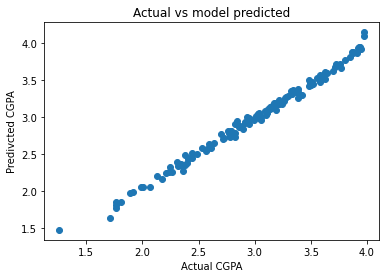

In [250]:
#plotting between actual and predicted score
plt.scatter(y_test,pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predivcted CGPA')
plt.title('Actual vs model predicted')
plt.show()

Finally, it is done.